In [2]:
import pandas as pd
from plotnine import *
import statsmodels.formula.api as smf

/Users/tanazmeghjani/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [9]:
df = pd.read_excel('houses.xlsx') 
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [10]:
df.corr().round(1)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
Home,1.0,0.1,0.2,-0.1,0.1,-0.1
Price,0.1,1.0,0.6,0.5,0.5,-0.3
SqFt,0.2,0.6,1.0,0.5,0.5,0.3
Bedrooms,-0.1,0.5,0.5,1.0,0.4,0.1
Bathrooms,0.1,0.5,0.5,0.4,1.0,0.1
Offers,-0.1,-0.3,0.3,0.1,0.1,1.0


In [11]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


/Users/tanazmeghjani/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


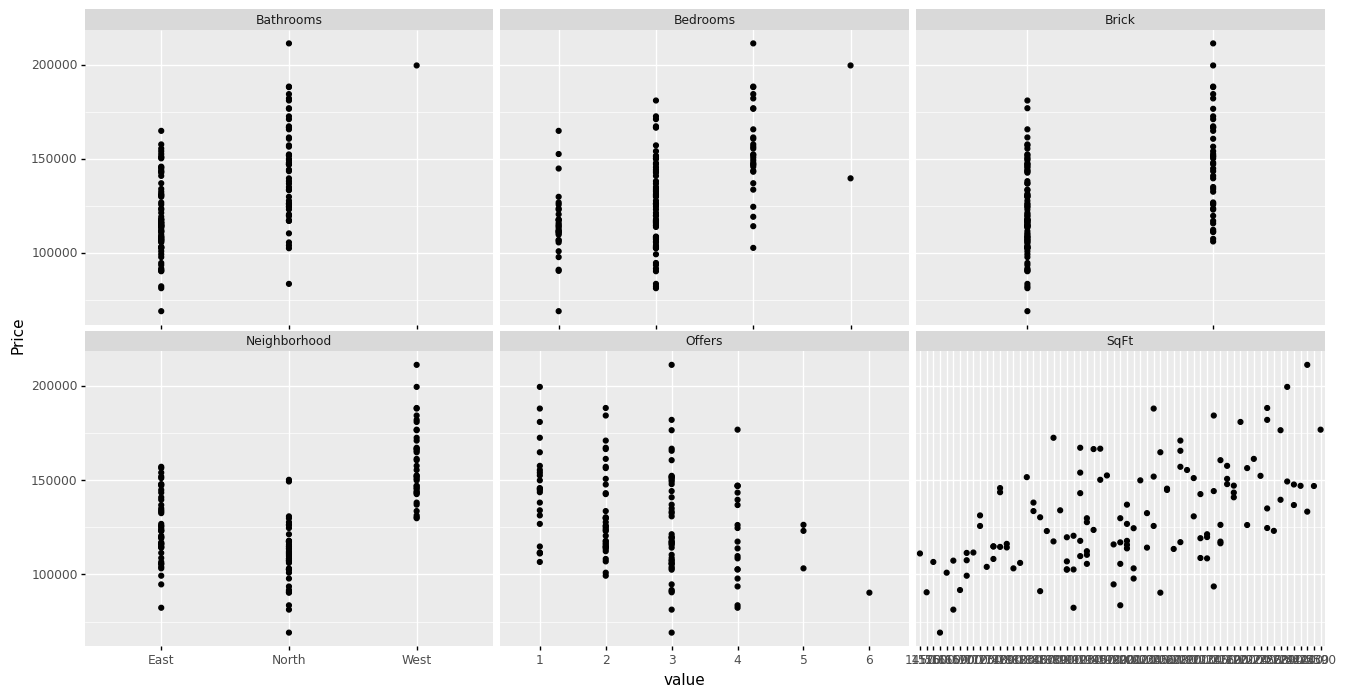

<ggplot: (365570311)>

In [13]:
to_plot = df.melt(id_vars=['Home','Price'])

(
    ggplot(to_plot, aes(x='value', y='Price')) +
        geom_point() +
        facet_wrap('variable', scales='free_x') + 
        theme(figure_size=(16,8))
)

In [37]:
import statsmodels.formula.api as smf

model = smf.ols("Price ~ SqFt + Neighborhood + Bathrooms + Brick", data=df)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     99.72
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.16e-41
Time:                        23:48:33   Log-Likelihood:                -1382.5
No. Observations:                 128   AIC:                             2777.
Df Residuals:                     122   BIC:                             2794.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.348e+04    1.1e+04      2.132      0.035    1678.897    4.53e+04
Neighborhood[T.North] -5168.4733   2704.909     -1.911      0.058   -1.05e+04     186.163
Neighborhood[T.West]   3.015e+04   2709.389     11.126      0.000    2.48e+04    3.55e+04
Brick[T.Yes]           1.831e+04   2388.301      7.667      0.000    1.36e+04     2.3e+04
SqFt                     37.9050      6.092      6.222      0.000      25.845      49.966
Bathrooms              7230.4265   2530.843      2.857      0.005    2220.369    1.22e+04
==============================================================================
Omnibus:                        0.695   Durbin-Watson:                   2.246
Prob(Omnibus):                  0.706   Jarque-Bera (JB):                0.359
Skew:                           0.095   Prob(JB):                        0.836
Kurtosis:                       3.177   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""